**Credits to Code Institute:** All code below is either; 
re-modeled, re-structed or re-created to fit this project.

## Modelling and Evaluation Notebook
**Credits to Code Institute:** All code below is either re-modeled, re-structed or re-created to fit this project.
### Objectives
* **Answer business requirement 2:**
* The client is interested to tell whether a given cherry leaf contains mildew or not.
### Inputs
* inputs/cherry-leaves_dataset/cherry-leaves/train
* inputs/cherry-leaves_dataset/cherry-leaves/test
* inputs/cherry-leaves_dataset/cherry-leaves/validation
* image shape embeddings.
### Outputs
* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.
### Additional Comments | Insights | Conclusions

### Import regular packages

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Set Working Directory

In [42]:
cwd= os.getcwd()

In [43]:
os.chdir('/workspace/mildewdetectionincherryleaves')
print("You have now set a new current directory for this part.")


You have now set a new current directory for this part.


In [44]:
work_dir = os.getcwd()
print("Displaying the current working directory:")
work_dir


Displaying the current working directory:


'/workspace/mildewdetectionincherryleaves'

---

### Set Input Directory

In [45]:
my_data_dir = 'inputs/cherry-leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set Output Directory

In [46]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('There is an old version availiable already, creating a new version.')
    pass
else:
    os.makedirs(name=file_path)

There is an old version availiable already, creating a new version.


### Set Labels for the Dataset

In [47]:
labels = os.listdir(train_path)

print(
    f"Mildew Detection in Cherry Leaves Dataset is Labeled: {labels}"
)

Mildew Detection in Cherry Leaves Dataset is Labeled: ['healthy', 'powdery_mildew']


### Calculations of Numbers of images in the Train, Test and Validation Data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images


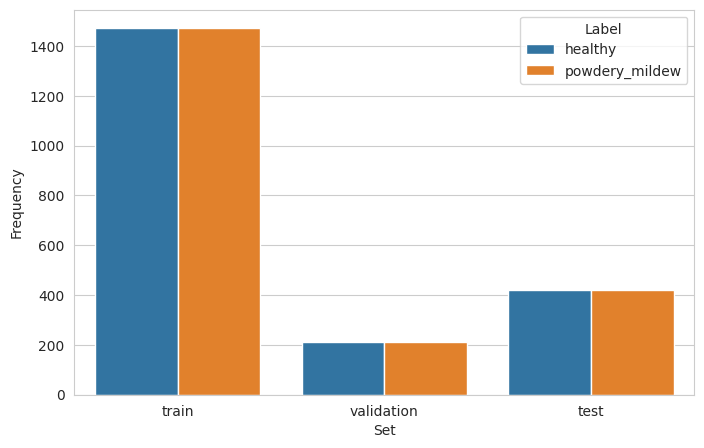

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


def calculate_label_frequencies(data_dir, labels, datasets):
  df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])
  for folder in datasets:
    for label in labels:
      data_path = os.path.join(data_dir, folder, label)
      if os.path.isdir(data_path):  # Check if directory exists
        num_images = len(os.listdir(data_path))
        df_freq = pd.concat([df_freq, pd.DataFrame({'Set': folder, 'Label': label, 'Frequency': num_images}, index=[0])], ignore_index=True)
        print(f"* {folder} - {label}: {num_images} images")
  return df_freq


labels = ["healthy", "powdery_mildew"]
data_dir = "inputs/cherry-leaves_dataset/cherry-leaves"
datasets = ["train", "validation", "test"]

df_freq = calculate_label_frequencies(data_dir, labels, datasets)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---

### Image Data Augmentation

---

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* Initialization of Image Data Generator

In [50]:
augmented_image_data = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

* Augmented Training of Image Dataset

In [51]:
import pandas as pd
import os

def create_train_generator(train_path, image_shape, batch_size, labels="binary"):
  augmented_image_data = ImageDataGenerator(rescale=1./255)
  if not os.path.exists(train_path):
    raise ValueError(f"Training data directory not found: {train_path}")

  return augmented_image_data.flow_from_directory(
      train_path,
      target_size=image_shape[:2],
      color_mode='rgb',
      batch_size=batch_size,
      class_mode=labels,
      shuffle=True
  )


def calculate_label_frequencies(data_dir, labels, datasets):
  df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])
  for folder in datasets:
    for label in labels:
      data_path = os.path.join(data_dir, folder, label)
      if os.path.isdir(data_path):
        try:
          num_images = len(os.listdir(data_path))
        except FileNotFoundError:
          num_images = 0
        df_freq = pd.concat([df_freq, pd.DataFrame({'Set': folder, 'Label': label, 'Frequency': num_images}, index=[0])], ignore_index=True)
  return df_freq


if __name__ == "__main__":
  image_shape = (256, 256)
  batch_size = 20
  labels = ["healthy", "powdery_mildew"]
  data_dir = "inputs/cherry-leaves_dataset/cherry-leaves"
  datasets = ["train", "validation", "test"]

  try:
    train_set = create_train_generator(train_path, image_shape, batch_size)
    df_freq = calculate_label_frequencies(data_dir, labels, datasets)
  except ValueError as e:
    print(f"Error: {e}")
  else:
    print(df_freq)
    
    print(f"Class Labels: {labels}")


Found 2944 images belonging to 2 classes.
          Set           Label Frequency
0       train         healthy      1472
1       train  powdery_mildew      1472
2  validation         healthy       210
3  validation  powdery_mildew       210
4        test         healthy       422
5        test  powdery_mildew       422
Class Labels: ['healthy', 'powdery_mildew']


* Augmented Validation of Image Dataset

In [52]:
validation_set = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(val_path,
                         target_size=image_shape[:2],
                         color_mode='rgb',
                         batch_size=batch_size,
                         class_mode='binary',
                         shuffle=False)

class_labels = dict(validation_set.class_indices)
print(class_labels)

Found 420 images belonging to 2 classes.
{'healthy': 0, 'powdery_mildew': 1}


* Creation of Augmented Test Image Dataset

In [53]:
def create_test_generator(test_path, image_shape, batch_size):
  test_data_gen = ImageDataGenerator(rescale=1./255)
  return test_data_gen.flow_from_directory(
      test_path,
      target_size=image_shape[:2],
      color_mode='rgb',
      batch_size=batch_size,
      class_mode='binary',
      shuffle=False
  )
  
test_set = create_test_generator(test_path, image_shape, batch_size)

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [54]:
import matplotlib.pyplot as plt


def display_image(image):
  if len(image.shape) not in (3, 4):
    raise ValueError("Image must have 3 or 4 dimensions (height, width, channels)")

  plt.imshow(image)
  plt.show()
  

### Plot Augmented Validation and Test Images

In [55]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import DirectoryIterator

for i in range(3):
  try:
    img, label = validation_set[i]
    print(img.shape)

    if len(img.shape) != 3:
        print(f"Image {i} has unexpected shape: {img.shape}")
        continue

    plt.imshow(img)
    plt.show()
  except IndexError:
    print("Reached end of validation set")
    break

(20, 256, 256, 3)
Image 0 has unexpected shape: (20, 256, 256, 3)


(20, 256, 256, 3)
Image 1 has unexpected shape: (20, 256, 256, 3)
(20, 256, 256, 3)
Image 2 has unexpected shape: (20, 256, 256, 3)


In [56]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import DirectoryIterator

for i in range(3):
  try:
    img, label = test_set[i]
    print(img.shape)


    if len(img.shape) != 3:
      print(f"Image {i} has unexpected shape: {img.shape}")
      continue

    if img.shape[0] != 256:
      img = img[..., :3]

    plt.imshow(img)
    plt.show()
  except IndexError:
    print("Reached end of test set")
    break

(20, 256, 256, 3)
Image 0 has unexpected shape: (20, 256, 256, 3)
(20, 256, 256, 3)
Image 1 has unexpected shape: (20, 256, 256, 3)
(20, 256, 256, 3)
Image 2 has unexpected shape: (20, 256, 256, 3)


### Saving of Class Indicies

In [57]:
import joblib
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

## Model Creation

---

### Model for Machine Learning

In [58]:
import joblib
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

* Import model packages for creation on model

In [59]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

* Models used by TensorFlow/Keras

In [60]:
def create_tf_model(image_shape):

    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model




* Model Summarization

In [61]:
image_shape = (256, 256, 3)
model = create_tf_model(image_shape)
model.summary()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,429,377 (28.34 MB)

 Trainable params: 7,429,377 (28.34 MB)

 Non-trainable params: 0 (0.00 B)

* Early Stopping Model

In [62]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### Adjust model to fit for Model Training

In [63]:
def create_tf_model(image_shape):
  model = Sequential()

  return model
image_shape = (256, 256, 3)

model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1)



Epoch 1/25


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


147/147 ━━━━━━━━━━━━━━━━━━━━ 117s 780ms/step - accuracy: 0.7668 - loss: 0.4577 - val_accuracy: 0.9929 - val_loss: 0.0139
Epoch 2/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 1:42 705ms/step - accuracy: 1.0000 - loss: 0.0020

2024-06-27 16:08:14.867346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/gitpod/.pyenv/versions/3.12.3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9952 - val_loss: 0.0133
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 117s 792ms/step - accuracy: 0.9819 - loss: 0.0502 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 1:42 699ms/step - accuracy: 1.0000 - loss: 7.9165e-04

2024-06-27 16:10:16.768189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 1.0000 - loss: 7.9165e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 114s 778ms/step - accuracy: 0.9968 - loss: 0.0123 - val_accuracy: 0.9929 - val_loss: 0.0272
Epoch 6/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 1:42 703ms/step - accuracy: 1.0000 - loss: 0.0056

2024-06-27 16:12:16.475344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9952 - val_loss: 0.0465
Epoch 7/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 120s 817ms/step - accuracy: 0.9929 - loss: 0.0205 - val_accuracy: 0.9976 - val_loss: 0.0077


### Save model to .h5

In [64]:
model.save('outputs/v1/mildew_detector_model.h5')

# Machine Learning Model Performance Data

---

## Model Learning Curve for the Cherry Leaves<br> Healthy to Powdery-Mildew Dataset

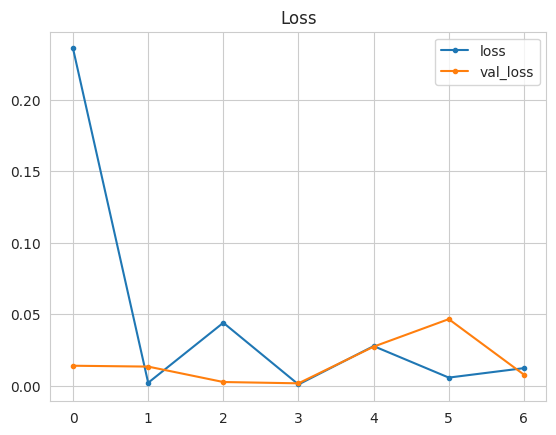

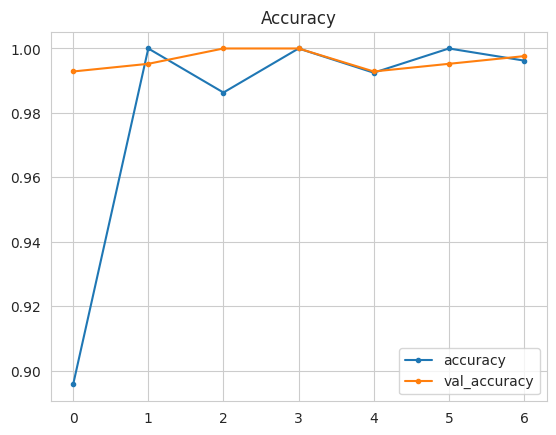

In [65]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.jpg',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.jpg',
            bbox_inches='tight', dpi=150)
plt.show()

### Load ML Model

* Load Saved Model in file format .h5 for use future ML applications

In [66]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detector_model.h5')

Model evaluation of Test Set, preparing for Evaluation Pickle

In [67]:
evaluation = model.evaluate(test_set)

 1/43 ━━━━━━━━━━━━━━━━━━━━ 17s 410ms/step - accuracy: 1.0000 - loss: 1.1210e-05

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - accuracy: 1.0000 - loss: 4.4438e-04


* Save Evaluation Pickle to file format .pkl

In [68]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

### Prediction of New data

* Loading a random image as a PIL Image

Image shape: (256, 256), Image mode: RGB


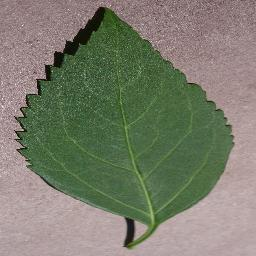

In [69]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

* Prepare the image for prediction, by converting to an array 

In [70]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


* Prediction of Class Propabilities

In [71]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
0.9999989523890918
healthy


### Push files to GitHub Repository

**Upload your Current Machine Learning files to your GitHub repository**

* Add .gitignore, this secures you from uploading unneccesary, or non public information.

In [72]:
!cat .gitignore

inputs
outputs
kaggle.json
*.ipynb
src
app_pages/__pycache__
.vscode
workspace

* Get current status from your pending session files, that have not been uploaded.

In [73]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   jupyter_notebooks/01 - DataCollection.ipynb
	modified:   jupyter_notebooks/02 - DataVisualization.ipynb
	modified:   jupyter_notebooks/03 - Modelling and Evaluation.ipynb
	modified:   outputs/v1/diff_avg_powdery_mildew_healthy.png
	modified:   outputs/v1/evaluation.pkl
	modified:   outputs/v1/mildew_detector_model.h5
	modified:   outputs/v1/model_training_acc.jpg
	modified:   outputs/v1/model_training_losses.jpg

no changes added to commit (use "git add" and/or "git commit -a")


* Add your current session files, and prepare them for push to your GitHub repository.

In [74]:
!git add .

* Commit your your changes for GitHub Repository version control and for history logs.

In [ ]:
!git commit -am " Add the new plots to your repository."

[main 36c9418]  Add new plots
 442 files changed, 365 insertions(+), 35 deletions(-)
 create mode 100644 images_project/cherry.webp
 create mode 100644 inputs/cherry-leaves_dataset/cherry-leaves/validation/healthy/02818f40-58e6-4c7d-bfbc-372d89b2045b___JR_HL 4259.JPG
 create mode 100644 inputs/cherry-leaves_dataset/cherry-leaves/validation/healthy/02818f40-58e6-4c7d-bfbc-372d89b2045b___JR_HL 4259_180deg.JPG
 create mode 100644 inputs/cherry-leaves_dataset/cherry-leaves/validation/healthy/02b90e70-80a6-415d-b6a8-07e22dead5c4___JR_HL 9892.JPG
 create mode 100644 inputs/cherry-leaves_dataset/cherry-leaves/validation/healthy/04189592-5db7-441e-a831-eaaa2d7f5d21___JR_HL 9867.JPG
 create mode 100644 inputs/cherry-leaves_dataset/cherry-leaves/validation/healthy/0438b691-45f8-4251-83bd-8344656716a1___JR_HL 4152_180deg.JPG
 create mode 100644 inputs/cherry-leaves_dataset/cherry-leaves/validation/healthy/069996a8-8cdb-4837-a5fe-c5a957b5677a___JR_HL 3938.JPG
 create mode 100644 inputs/cherry-leav

* Push (upload) your changes to GitHub Repository and benefit from both version control and history logs.

In [ ]:
!git push

Enumerating objects: 467, done.
Counting objects: 100% (463/463), done.
Delta compression using up to 16 threads
Compressing objects: 100% (449/449), done.
Writing objects: 100% (456/456), 70.78 MiB | 11.17 MiB/s, done.
Total 456 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 1 local object.
remote: warning: See https://gh.io/lfs for more information.
remote: warning: File outputs/v1/mildew_detector_model.h5 is 85.07 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/OV00VO/mildewdetectionincherryleaves.git
   27e534c..36c9418  main -> main


### End of Step By Step Instructions for Modelling and Evaluation - Well Done!